In [ ]:
# import regular expressins packge
# import numbers package
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import re

In [ ]:
def readFile(fileName):
    file = open(fileName,'r',encoding="cp437")
    fileText = ""
    for line in file:
        fileText += line
    return fileText

In [ ]:
# preprocess text
def preProcess(text):
# Remove non-letter chars
    text = re.sub("[^a-zA-Z ]"," ", text)
# Remove extra spaces
    #text = re.sub(" +"," ", text)
# Change characters to lower
    text = text.lower()
    return text

In [ ]:
# generate a word set of a given text
def genDictionary(texts,stopWords):
# concatenate the texts
    allText = ""
    for line in texts:
        allText += line

    # Generate a word list
    wordsList =  allText.split()
    # Generate a word set
    wordsSet =  set(wordsList)

# Remove the stop words from the word list
    stopWordsList = stopWords.split()
    stopWordsSet = set(stopWordsList)
    dictSet = wordsSet.difference(stopWordsSet)
    return list(dictSet)

In [ ]:
# find the distance between arrays
def arrayDist(freqArray1,freqArray2):
    diffArray = freqArray1-freqArray2
#        copute the distance ("pitagoras")
    sqrArray =  np.square(diffArray)
    sumArray =  np.sum(sqrArray)
    return np.sqrt(sumArray)

In [ ]:
def getWordFrequency(texts,dictList):
    dictSize = len(dictList)
    nTexts = len(texts)
    wordFreq = np.empty((nTexts,dictSize),dtype=np.int64)
    for i in range(nTexts):
        print("text" + str(i))
        for j in range(dictSize):
            wordFreq[i,j] = len(re.findall(dictList[j],texts[i]))
    return wordFreq

In [ ]:
# Remove extreme word frequencies
def reduceMatrix(wordFreq,dictList,minFreq=10,maxFreq=500):
    rows,colomns = wordFreq.shape
    reducedFreq = np.empty((rows,0),dtype=np.int64)
    removedMaxWords = []
    removedMinWords = []
    for i in range(colomns):
        # Find the sum of ever colomn
        sumArrI = wordFreq[:,i].sum()
        # list the words that apear too many times
        if(sumArrI > maxFreq):
            removedMaxWords +=  [dictList[i]]
        # list the words that apear too few times
        elif(sumArrI < minFreq):
            removedMinWords +=  [dictList[i]]
        else:
            # Concatenate colomn I to the matrix
            wordFreqI = wordFreq[:,i].reshape(rows,1)
            reducedFreq = np.concatenate((reducedFreq,wordFreqI),axis=1)
    return reducedFreq,removedMaxWords,removedMinWords

In [ ]:
#Partition the text into a list of chunks of size windSize
def partitionText(text, windSize):
    numParts = len(text)//windSize
    chunks=[]
    for i in range(numParts):
        nextWind = i*windSize
        nextChunk = text[nextWind:nextWind+windSize]
        chunks += [nextChunk]
    return chunks;

## Section 2

In [ ]:
bookTexts = []

#read  and preprocess files
bookTexts += [readFile('Eliot.txt')]
bookTexts += [readFile('Tolkien.txt')]
bookTexts += [readFile('HP_Small.txt')]

texts = []
for text in bookTexts:
    texts += [preProcess(text)]

# Read stop words file - words that can be removed
stopWords = readFile('stopwords_en.txt')

## Section 3

In [ ]:
#wind - chunks size
wind = 10000
#partition the each file into chunks of the size wind
chunks = []
for text in texts:
    chunks+= partitionText(text , wind)

## Section 4

In [ ]:
# Generate dictionary
dictList = genDictionary(texts,stopWords)

## Section 5

In [ ]:
wordFreq = getWordFrequency(chunks,dictList)

text0
text1
text2
text3
text4
text5
text6
text7
text8
text9
text10
text11
text12
text13
text14
text15
text16
text17
text18
text19
text20
text21
text22
text23
text24
text25
text26
text27
text28
text29
text30
text31
text32
text33
text34
text35
text36
text37
text38
text39
text40
text41
text42
text43
text44
text45
text46
text47
text48
text49
text50
text51
text52
text53
text54
text55
text56
text57
text58
text59
text60
text61
text62
text63
text64
text65
text66
text67
text68
text69
text70
text71
text72
text73
text74
text75
text76
text77
text78
text79
text80
text81
text82
text83
text84
text85
text86
text87
text88
text89
text90
text91
text92
text93
text94
text95
text96
text97
text98
text99
text100
text101
text102
text103
text104
text105
text106
text107
text108
text109
text110
text111
text112
text113
text114
text115
text116
text117
text118
text119
text120
text121
text122
text123
text124
text125
text126
text127
text128
text129
text130
text131
text132
text133
text134
text135
text136
text137
text13

## Section 6

In [ ]:
# find the sum of the frequency colomns and
# select colomns having sum > minSum and sum < maxSum
minFreq = 10
maxFreq = 500

# select colomns with frequencies between minFreq and  maxFreq
reducedMat,removedMaxWords,removedMinWords = reduceMatrix(wordFreq,dictList,minFreq,maxFreq)

## Section 7

In [ ]:
k = len(bookTexts)

# define the k-means object
kmeans = KMeans(n_clusters = k)
# compute the k-means model of the chunks
kmeans.fit(reducedMat)
# predict the labels of the chunks
labels = kmeans.predict(reducedMat)
labels +=1

## Section 8

[1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3
 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1]
Estimated sizes: [520000, 500000, 490000]
Real sizes: [520189, 506564, 495593]
Differences [189, 6564, 5593]


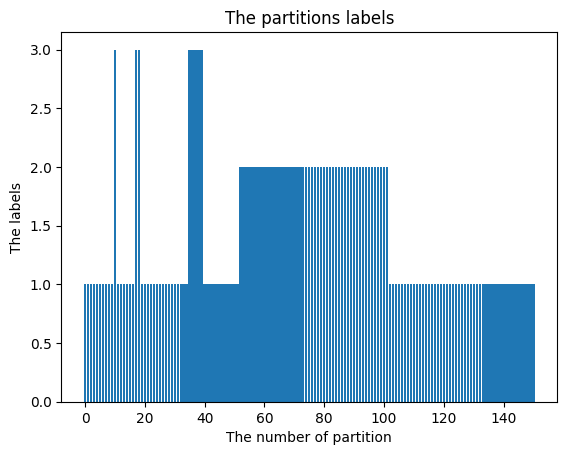

In [ ]:
print(labels)
counters=[]
counters.append(np.count_nonzero(labels == 3))
counters.append(np.count_nonzero(labels == 2))
counters.append(np.count_nonzero(labels == 1))

predict_size_of_books = [52*10000,50*10000,49*10000]

real_size = [len(bookTexts[0]), len(bookTexts[1]), len(bookTexts[2])]

differences = [real_size[0]-predict_size_of_books[0], real_size[1]-predict_size_of_books[1], real_size[2]-predict_size_of_books[2]]
print(f"Estimated sizes: {predict_size_of_books}")

print(f"Real sizes: {real_size}")

print(f"Differences {differences}")


# plot the k-means prediction
numLabels = len(labels)
plt.bar(range(numLabels),labels)
plt.title("The partitions labels")
plt.xlabel("The number of partition")
plt.ylabel("The labels")
plt.show()